In [1]:
#Importando librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)

https://github.com/JoaquinAmatRodrigo/skforecast

In [2]:
#PREPARAMOS DATASET
datos = pd.read_csv('dataset.csv', sep=";", decimal='.')
datos

# Asignar nombre a las columnas
columnas=['Unnamed: 0', 'Country or Area', 'Year', 'Metano', 'Co2', 'N2o',
       'Temperature', 'Code', 'Hydropower',
       'Solar', 'Wind',
       'Other renewables']

# Descargar el dataset
datos = pd.read_csv('dataset.csv', sep=";", names=columnas, header=0,thousands=' ', decimal='.')

#Eliminar columnas sin nombre
datos=datos.drop(['Unnamed: 0'], axis=1)
datos

,Country or Area,Year,Metano,Co2,N2o,Temperature,Code,Hydropower,Solar,Wind,Other renewables
0,Australia,2018,109532.0,415953,20114.0,1.112,AUS,1.726,12.00000,16.266,3.539
1,Australia,2017,108170.0,415097,21265.0,1.117,AUS,1.353,8.00000,13.193,3.543
2,Australia,2016,105873.0,411031,19566.0,1.142,AUS,1.768,7.00000,13.026,3.648
3,Australia,2015,105368.0,401554,19557.0,1.051,AUS,1.394,5.00000,11.802,3.691
4,Australia,2014,105070.0,394116,20096.0,1.139,AUS,1.453,4.00000,9.777,3.546
...,...,...,...,...,...,...,...,...,...,...,...
1171,Brasil,2014,567542.0,552841,NaN,1.293,BRA,373.439,0.01608,12.210,46.384
1172,Brasil,2015,532432.0,521457,NaN,1.697,BRA,359.742,0.05891,21.625,49.236
1173,Brasil,2016,576542.0,488167,NaN,1.607,BRA,380.910,0.08526,33.488,51.040
1174,Brasil,2017,534321.0,497271,NaN,1.498,BRA,370.906,0.83181,42.373,51.272


In [3]:
#ESTIMAMOS VALORES AUSENTES
import numpy as np
from sklearn.impute import SimpleImputer

datos["N2o"]=datos["N2o"].fillna(datos["N2o"].mean())
datos["Metano"]=datos["Metano"].fillna(datos["Metano"].mean())
datos.head()

,Country or Area,Year,Metano,Co2,N2o,Temperature,Code,Hydropower,Solar,Wind,Other renewables
0,Australia,2018,109532.0,415953,20114.0,1.112,AUS,1.726,12.0,16.266,3.539
1,Australia,2017,108170.0,415097,21265.0,1.117,AUS,1.353,8.0,13.193,3.543
2,Australia,2016,105873.0,411031,19566.0,1.142,AUS,1.768,7.0,13.026,3.648
3,Australia,2015,105368.0,401554,19557.0,1.051,AUS,1.394,5.0,11.802,3.691
4,Australia,2014,105070.0,394116,20096.0,1.139,AUS,1.453,4.0,9.777,3.546


In [4]:
datos=datos.drop(columns=["Code"])
datos

,Country or Area,Year,Metano,Co2,N2o,Temperature,Hydropower,Solar,Wind,Other renewables
0,Australia,2018,109532.0,415953,20114.000000,1.112,1.726,12.00000,16.266,3.539
1,Australia,2017,108170.0,415097,21265.000000,1.117,1.353,8.00000,13.193,3.543
2,Australia,2016,105873.0,411031,19566.000000,1.142,1.768,7.00000,13.026,3.648
3,Australia,2015,105368.0,401554,19557.000000,1.051,1.394,5.00000,11.802,3.691
4,Australia,2014,105070.0,394116,20096.000000,1.139,1.453,4.00000,9.777,3.546
...,...,...,...,...,...,...,...,...,...,...
1171,Brasil,2014,567542.0,552841,25558.171717,1.293,373.439,0.01608,12.210,46.384
1172,Brasil,2015,532432.0,521457,25558.171717,1.697,359.742,0.05891,21.625,49.236
1173,Brasil,2016,576542.0,488167,25558.171717,1.607,380.910,0.08526,33.488,51.040
1174,Brasil,2017,534321.0,497271,25558.171717,1.498,370.906,0.83181,42.373,51.272


In [5]:
datos.isnull().sum()

Country or Area     0
Year                0
Metano              0
Co2                 0
N2o                 0
Temperature         0
Hydropower          0
Solar               0
Wind                0
Other renewables    0
dtype: int64

In [6]:
datos.dtypes

Country or Area      object
Year                  int64
Metano              float64
Co2                   int64
N2o                 float64
Temperature         float64
Hydropower           object
Solar               float64
Wind                float64
Other renewables    float64
dtype: object

In [7]:
datos["Metano"]=datos["Metano"].astype('int')
datos["N2o"]=datos["N2o"].astype('int')
datos["Temperature"]=datos["Temperature"].astype('float64')


datos["Hydropower"] = pd.to_numeric(datos.Hydropower, errors='coerce')



#datos["Hydropower"]=datos["Hydropower"].astype('int')
#datos["Solar"]=datos["Solar"].astype('float64')
#datos["Wind"]=datos["Wind"].astype('float64')
datos["Other renewables"]=datos["Other renewables"].astype('float64')
datos["Year"] = datos["Year"].astype('object')
#Para proceder con el minMax necesitamos que todos los datos sean numericos. Por eso hemos pasado todos los datos a integer y float.

In [8]:
datos.head()

,Country or Area,Year,Metano,Co2,N2o,Temperature,Hydropower,Solar,Wind,Other renewables
0,Australia,2018,109532,415953,20114,1.112,1.726,12.0,16.266,3.539
1,Australia,2017,108170,415097,21265,1.117,1.353,8.0,13.193,3.543
2,Australia,2016,105873,411031,19566,1.142,1.768,7.0,13.026,3.648
3,Australia,2015,105368,401554,19557,1.051,1.394,5.0,11.802,3.691
4,Australia,2014,105070,394116,20096,1.139,1.453,4.0,9.777,3.546


In [9]:
datos.dtypes

Country or Area      object
Year                 object
Metano                int32
Co2                   int64
N2o                   int32
Temperature         float64
Hydropower          float64
Solar               float64
Wind                float64
Other renewables    float64
dtype: object

Todos los pasos anteriores son los de siempre, la cargar del dataset y modificar columnas y demás... Comentar series temporales viene a partir de aquí

Inicamos las series temporales

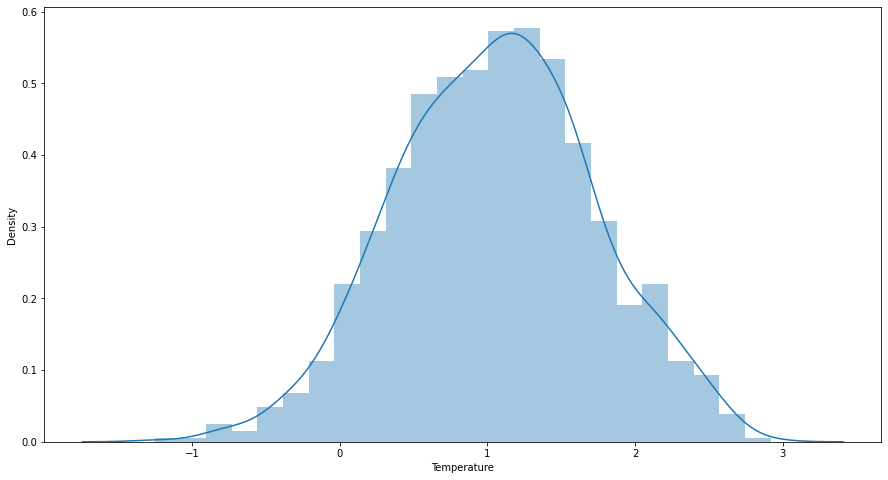

In [10]:
#Vemos que la temperatura sube una distribución normal:
temperatura = sns.distplot(datos.Temperature)

ESTUDIAR LA CORRELACIÓN DE LOS DATOS

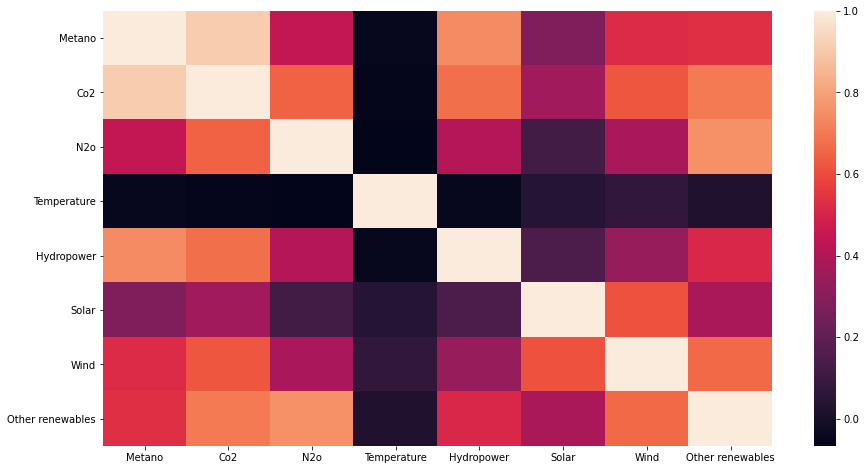

In [11]:
sns.heatmap(datos.corr())
#A continuación podemos ver la correlacción de todas las variables que se han generado al realizar las dummies.

In [12]:
from scipy.stats import pearsonr, kendalltau, spearmanr

pearson = pearsonr(datos["Co2"],datos["Temperature"])
kendall = kendalltau(datos["Co2"],datos["Temperature"])
spearman_result = spearmanr(datos["Co2"],datos["Temperature"])
# Todas estas funciones devuelven una tupla cuyo primer valor es el estadístico y el segundo su p-value
print("Pearson:", pearson)
print("Kendall:", kendall)
print("Spearman:", spearman_result)

Pearson: (-0.056462191587010754, 0.05290015939253392)
Kendall: KendalltauResult(correlation=-0.08161023015613934, pvalue=2.7805391282793386e-05)
Spearman: SpearmanrResult(correlation=-0.12096410670914604, pvalue=3.195402319786404e-05)


Como podemos apreciar con los resultados obtenidos medainte Pearson, Kendall y Spearman. Son todos valores practicamente iguales a 0, lo cual nos indica que no hay dependencia entre el co2 y la temperatura. Es decir, que aumente o disminuya el Co2 no afecta a la temperatura. La causa principal de ello, es que posiblemente no dispongamos de una muestra relativamente grande. Necesitariamos una serie temporal más prolongada en el tiempo de la que tenemos. Es un punto clave del TFM, ya que nos afectará a la hora de realizar las predicciones futuras.

[Text(0, 0.5, 'Temperature'), Text(0.5, 0, 'Year')]

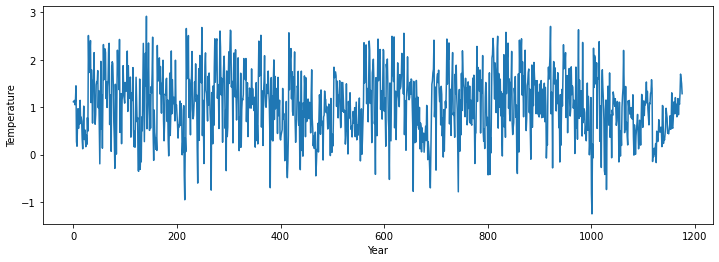

In [13]:
#Gráfico lineal de temperatura por cada año
import matplotlib.pyplot as plt
import numpy as np

temperature=datos["Temperature"]
fig,ax=plt.subplots(1,figsize=(12,4))
temperature.plot(ax=ax)
ax.set(ylabel="Temperature",xlabel="Year")
#Breve representación de los datos de temperaratura por años

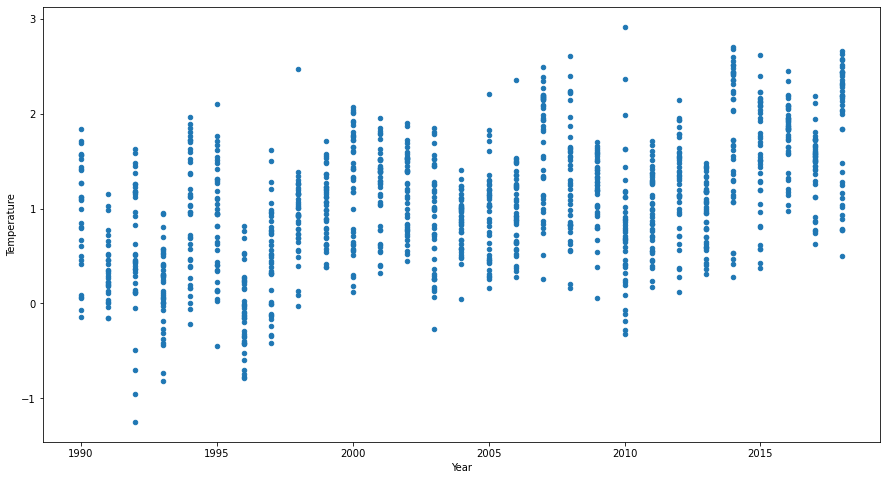

In [14]:
datos.plot.scatter(x="Year",y="Temperature")
#Otra manera de representar Años y temperatura. Que nos servirá como punto de partida en las predicciones que haremos
#más adelante

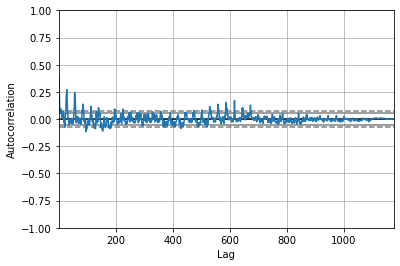

In [15]:
%matplotlib inline
pd.plotting.autocorrelation_plot(datos["Temperature"])
plt.show()
#Este modelo nos muestra la correlación que tiene la temperatura en el contexto

# GENERAMOS LAS VARIABLES DUMMIES

In [16]:

datos = pd.get_dummies(datos[['Country or Area','Year', 'Metano', 'Co2', 'N2o', 'Temperature',
        'Hydropower', 'Solar', 'Wind', 'Other renewables']], drop_first=False)
#datos["Year"]=datos["Year"].fillna(datos["Year"].mean())
#datos["Hydropower"]=datos["Hydropower"].fillna(datos["Hydropower"].mean())

In [17]:
datos.isnull().sum()

Metano         0
Co2            0
N2o            0
Temperature    0
Hydropower     5
              ..
Year_2014      0
Year_2015      0
Year_2016      0
Year_2017      0
Year_2018      0
Length: 79, dtype: int64

In [18]:
from sklearn import preprocessing
import pandas as pd

#NORMALIZAMOS TODO EL DATASET
scaler=preprocessing.MinMaxScaler()
names=datos.columns
datos = scaler.fit_transform(datos)
datos= pd.DataFrame(datos, columns=names)
datos.head()

,Metano,Co2,N2o,Temperature,Hydropower,Solar,Wind,Other renewables,Country or Area_Australia,Country or Area_Austria,...,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
0,0.051229,0.037098,0.043076,0.566939,0.001898,0.039047,0.044443,0.037334,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.050589,0.037021,0.045575,0.568138,0.001487,0.026031,0.036046,0.037376,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.049509,0.036657,0.041886,0.574136,0.001944,0.022777,0.035590,0.038483,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.049271,0.035807,0.041867,0.552303,0.001533,0.016269,0.032246,0.038937,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.049131,0.035140,0.043037,0.573417,0.001597,0.013016,0.026713,0.037407,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
#Iniciamos el proceso del análisis predictivo con el tratado de los datos y que así nos permitan trabajar con el modelo
#predictivo sin problema alguno

X=datos.iloc[:,1].values
y=datos.iloc[:,4].values
#Simplemente generamos los valores de X(METANO,CO2,N2O), e Y(Temperature)

ESTUDIAR LA CORRELACIÓN DE LOS DATOS, incluidas las variables dummies

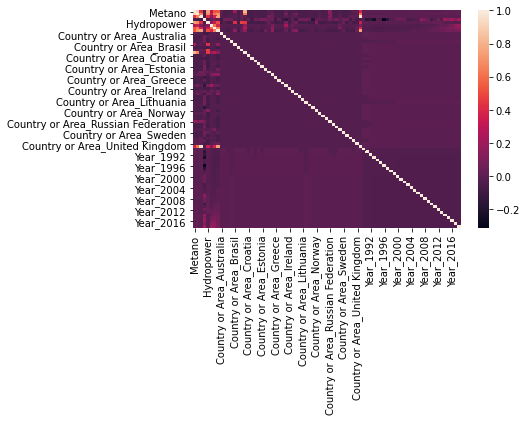

In [20]:
sns.heatmap(datos.corr())
#A continuación podemos ver la correlacción de todas las variables que se han generado al realizar las dummies.

# TRAIN-TEST

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

#Entrenamos los modelos mediante train_test_split. Los valores entrenados serán de un 70%.

In [22]:
#librerias
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
(X_train.shape,y_train.shape)

((823,), (823,))

In [25]:
X_train = X_train.reshape(-1, 1)

In [26]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [28]:
inds=np.where(np.isnan(y_train))
inds
y_train = np.nan_to_num(y_train, nan=0)

In [29]:
np.count_nonzero(np.isnan(y_train))

0

In [27]:
(X_train.shape,y_train.shape)

((823, 1), (823, 1))

Ahora que no tenemos nulos, y tenemos la dimensión adecuada podemos aplicar regresión lineal.

In [30]:
#Calculamos el linear regression
lm=LinearRegression(fit_intercept=True)
lr=lm.fit(X_train,y_train)

In [31]:
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
#En este paso lo que vamos a hacer es calcular la predicción de mediante linear regresion usando los datos testeados de X.
y_pred=lm.predict(X_test)
y_pred

In [33]:
#Accuracy del dataset de entrenamiento. Lo que hacemos en este paso es evaluar el modelo, obteniendo como resultado
#el porcentaje de observaciones que se han clasificado bien
lm.score(X_train,y_train)

0.3396045925159151

In [34]:
(X_test.shape,y_test.shape)

((353, 1), (353, 1))

In [35]:
#np.count_nonzero(np.isnan(X_test))
np.count_nonzero(np.isnan(y_test))

1

In [36]:
inds=np.where(np.isnan(y_test))
inds
y_test = np.nan_to_num(y_test, nan=0)

In [37]:
#Accuracy del dataset de testeo
lm.score(X_test,y_test)

0.3292979898908016

In [38]:
#The mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,lm.predict(X_test))
mae

0.04798824188314455

In [39]:
#Mean squared error
mse=mean_squared_error(y_test,y_pred)
mse

0.008295185927583975

In [40]:
#Coeficiente, que nos imprimiará los coeficientes de la linea de regresión, que nos servirán para la predicción
lm.coef_

array([[0.52009615]])

In [41]:
#The intercept
lm.intercept_

array([0.02797426])

### NO CORRER SIGUIENTE CÓDIGO!

<AxesSubplot:>

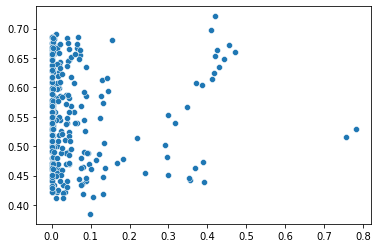

In [ ]:
#import pandas as pd
#import numpy as np
#import sklearn
#from scipy import stats
#import matplotlib.pyplot as plt
#import os
#import seaborn as sns
#sns.scatterplot(y_test,y_pred)


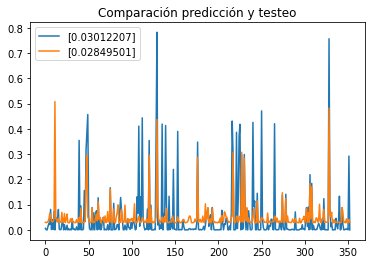

In [42]:
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparación predicción y testeo")
plt.legend(y_pred)
#En el siguiente gráfico podemos ver la compartiva entre los datos testeados y los datos predichos

seguimos...

# Predicción

En este apartado simplemente hacemos un estudio de las series temporales sin tratar los datos, es decir sin ser 
entrenados ,normalizados o haciendo la función dummies al dataset.
Ya que la predicción se va a basar en el estudio de la temperatura, es decir con los datos que disponemos

https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8

In [ ]:
#No incluir carga ni nada en el word. Ya que es lo mismo de siempre

In [ ]:

#PREPARAMOS DATASET
datos = pd.read_csv('dataset.csv', sep=";", decimal='.')
datos

# Asignar nombre a las columnas
columnas=['Unnamed: 0', 'Country or Area', 'Year', 'Metano', 'Co2', 'N2o',
       'Temperature', 'Code', 'Hydropower',
       'Solar', 'Wind',
       'Other renewables']

# Descargar el dataset
datos = pd.read_csv('dataset.csv', sep=";", names=columnas, header=0,thousands=' ', decimal='.')

#Eliminar columnas sin nombre
datos=datos.drop(['Unnamed: 0'], axis=1)
datos

,Country or Area,Year,Metano,Co2,N2o,Temperature,Code,Hydropower,Solar,Wind,Other renewables
0,Australia,2018,109532.0,415953,20114.0,1.112,AUS,1.726,12.00000,16.266,3.539
1,Australia,2017,108170.0,415097,21265.0,1.117,AUS,1.353,8.00000,13.193,3.543
2,Australia,2016,105873.0,411031,19566.0,1.142,AUS,1.768,7.00000,13.026,3.648
3,Australia,2015,105368.0,401554,19557.0,1.051,AUS,1.394,5.00000,11.802,3.691
4,Australia,2014,105070.0,394116,20096.0,1.139,AUS,1.453,4.00000,9.777,3.546
...,...,...,...,...,...,...,...,...,...,...,...
1171,Brasil,2014,567542.0,552841,NaN,1.293,BRA,373.439,0.01608,12.210,46.384
1172,Brasil,2015,532432.0,521457,NaN,1.697,BRA,359.742,0.05891,21.625,49.236
1173,Brasil,2016,576542.0,488167,NaN,1.607,BRA,380.910,0.08526,33.488,51.040
1174,Brasil,2017,534321.0,497271,NaN,1.498,BRA,370.906,0.83181,42.373,51.272


In [ ]:
#ESTIMAMOS VALORES AUSENTES
import numpy as np
from sklearn.impute import SimpleImputer

datos["N2o"]=datos["N2o"].fillna(datos["N2o"].mean())
datos["Metano"]=datos["Metano"].fillna(datos["Metano"].mean())
datos.head()

,Country or Area,Year,Metano,Co2,N2o,Temperature,Code,Hydropower,Solar,Wind,Other renewables
0,Australia,2018,109532.0,415953,20114.0,1.112,AUS,1.726,12.0,16.266,3.539
1,Australia,2017,108170.0,415097,21265.0,1.117,AUS,1.353,8.0,13.193,3.543
2,Australia,2016,105873.0,411031,19566.0,1.142,AUS,1.768,7.0,13.026,3.648
3,Australia,2015,105368.0,401554,19557.0,1.051,AUS,1.394,5.0,11.802,3.691
4,Australia,2014,105070.0,394116,20096.0,1.139,AUS,1.453,4.0,9.777,3.546


In [ ]:
datos=datos.drop(columns=["Code"])
datos

,Country or Area,Year,Metano,Co2,N2o,Temperature,Hydropower,Solar,Wind,Other renewables
0,Australia,2018,109532.0,415953,20114.000000,1.112,1.726,12.00000,16.266,3.539
1,Australia,2017,108170.0,415097,21265.000000,1.117,1.353,8.00000,13.193,3.543
2,Australia,2016,105873.0,411031,19566.000000,1.142,1.768,7.00000,13.026,3.648
3,Australia,2015,105368.0,401554,19557.000000,1.051,1.394,5.00000,11.802,3.691
4,Australia,2014,105070.0,394116,20096.000000,1.139,1.453,4.00000,9.777,3.546
...,...,...,...,...,...,...,...,...,...,...
1171,Brasil,2014,567542.0,552841,25558.171717,1.293,373.439,0.01608,12.210,46.384
1172,Brasil,2015,532432.0,521457,25558.171717,1.697,359.742,0.05891,21.625,49.236
1173,Brasil,2016,576542.0,488167,25558.171717,1.607,380.910,0.08526,33.488,51.040
1174,Brasil,2017,534321.0,497271,25558.171717,1.498,370.906,0.83181,42.373,51.272


In [ ]:
datos["Metano"]=datos["Metano"].astype('int')
datos["N2o"]=datos["N2o"].astype('int')
datos["Temperature"]=datos["Temperature"].astype('float64')


datos["Hydropower"] = pd.to_numeric(datos.Hydropower, errors='coerce')



#datos["Hydropower"]=datos["Hydropower"].astype('int')
#datos["Solar"]=datos["Solar"].astype('float64')
#datos["Wind"]=datos["Wind"].astype('float64')
datos["Other renewables"]=datos["Other renewables"].astype('float64')

#datos["Year"] = datos["Year"].astype('object')


#Para proceder con el minMax necesitamos que todos los datos sean numericos. Por eso hemos pasado todos los datos a integer y float.

# Modeling with Prophet

Mediante Prophet lo que vamos a hacer es una predicción, en este caso la predcción se va a realizar sobre la temperatura. 
Después de analizar y entrenar los datos, vamos a realizar una predicción. 
También generaremos tres situaciones futuras, la continuación de la tendencia, una situación menos mala y la situación que
sería el objetivo del acuerdo de París

PREDICCION SI SEGUIMOS CON LOS DATOS ACTUALES

In [ ]:
datos2=datos.rename(columns={"Year":"ds","Temperature":"y"})
#En este apartado tenemos que cambiar los nombres de las calumnas que queremos predecir, para que nos lo pueda leer
#el modelo

In [ ]:
#!pip install fbprophet
#!pip install prophet
import fbprophet
from prophet import Prophet
datos2_prophet=fbprophet.Prophet(changepoint_prior_scale=0.10)
datos2_prophet.fit(datos2)
#Nuestra predicción se va a llevar a cabo con prophet, lo que hacemos es pasarle el dataset sin pasar las variables 
#dummies ni el min max

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
datos2_forecast=datos2_prophet.make_future_dataframe(periods=40*2,freq="Y")
datos2_forecast=datos2_prophet.predict(datos2_forecast)
#Establecemos el número de periodos

Text(0.5, 1.0, 'simple test')

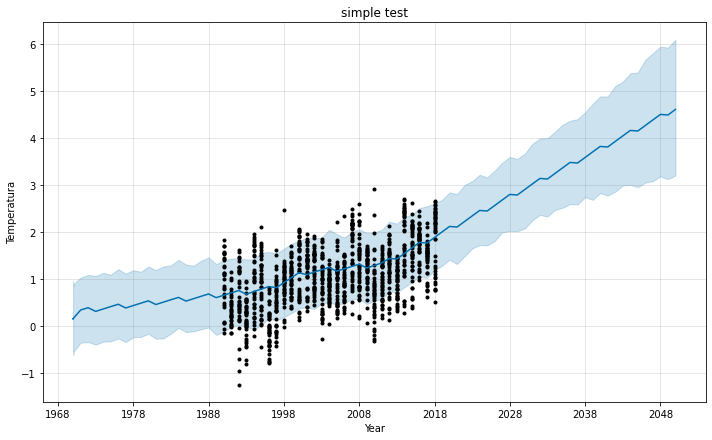

In [ ]:
datos2_prophet.plot(datos2_forecast,xlabel="Year",ylabel="Temperatura")
plt.title("simple test")
#representamos la predicción 

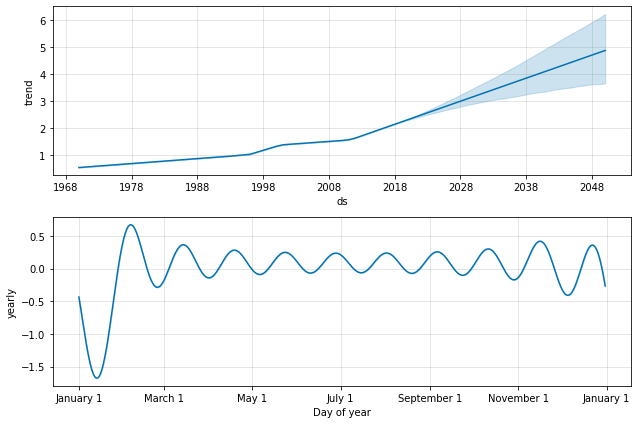

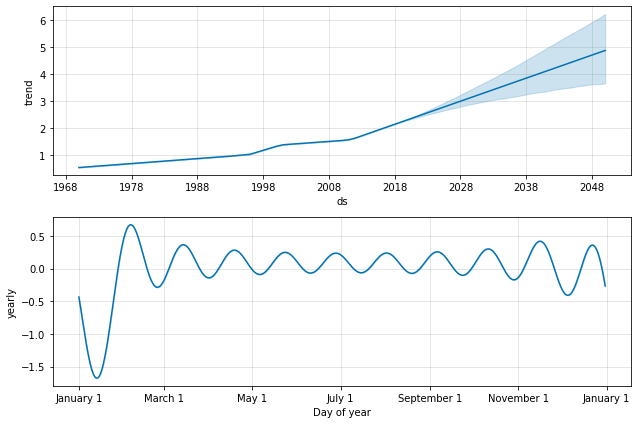

In [ ]:
datos2_prophet.plot_components(datos2_forecast)
#En las siguientes gráfica podemos ver la tendencia, que es creciente y a la vez muy preocupante para corregir 
#el cambio climático. Por lo que si no se tomasen medidas más drásticas tendriamos resultados catastróficos en el año 2050.
#Y por lo tanto no se cumpliría el acuerdo de París

Podemos ver la tendencia del modelo, la estacionalidad se puede hacer referencia.

# Predicción con una reducciendo en la mitad la temperatura (MENOS MALA)

In [ ]:
datos2["y"]=datos2["y"]/2


In [ ]:
import fbprophet

# Make the prophet model and fit on the data
datos2_prophet=fbprophet.Prophet(changepoint_prior_scale=0.10)
datos2_prophet.fit(datos2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
datos2_forecast=datos2_prophet.make_future_dataframe(periods=40*2,freq="Y")
datos2_forecast=datos2_prophet.predict(datos2_forecast)

Text(0.5, 1.0, 'simple test')

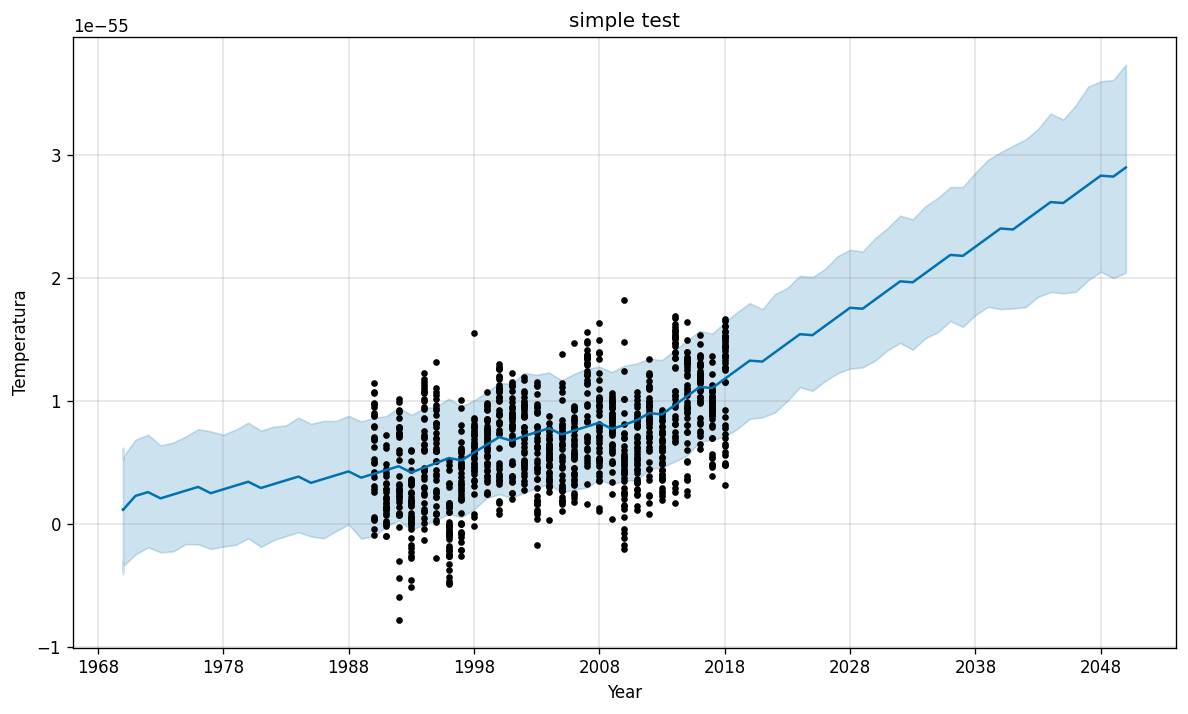

In [ ]:
datos2_prophet.plot(datos2_forecast,xlabel="Year",ylabel="Temperatura")
plt.title("simple test")
#representamos la predicción 

# Predicción reduciendo la temperatura cuatro veces(SITUACIÓN IDEAL)

In [ ]:
datos2["y"]=datos2["y"]/4

In [ ]:
import fbprophet

# Make the prophet model and fit on the data
datos2_prophet=fbprophet.Prophet(changepoint_prior_scale=0.10)
datos2_prophet.fit(datos2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
datos2_forecast=datos2_prophet.make_future_dataframe(periods=40*2,freq="Y")
datos2_forecast=datos2_prophet.predict(datos2_forecast)

Text(0.5, 1.0, 'simple test')

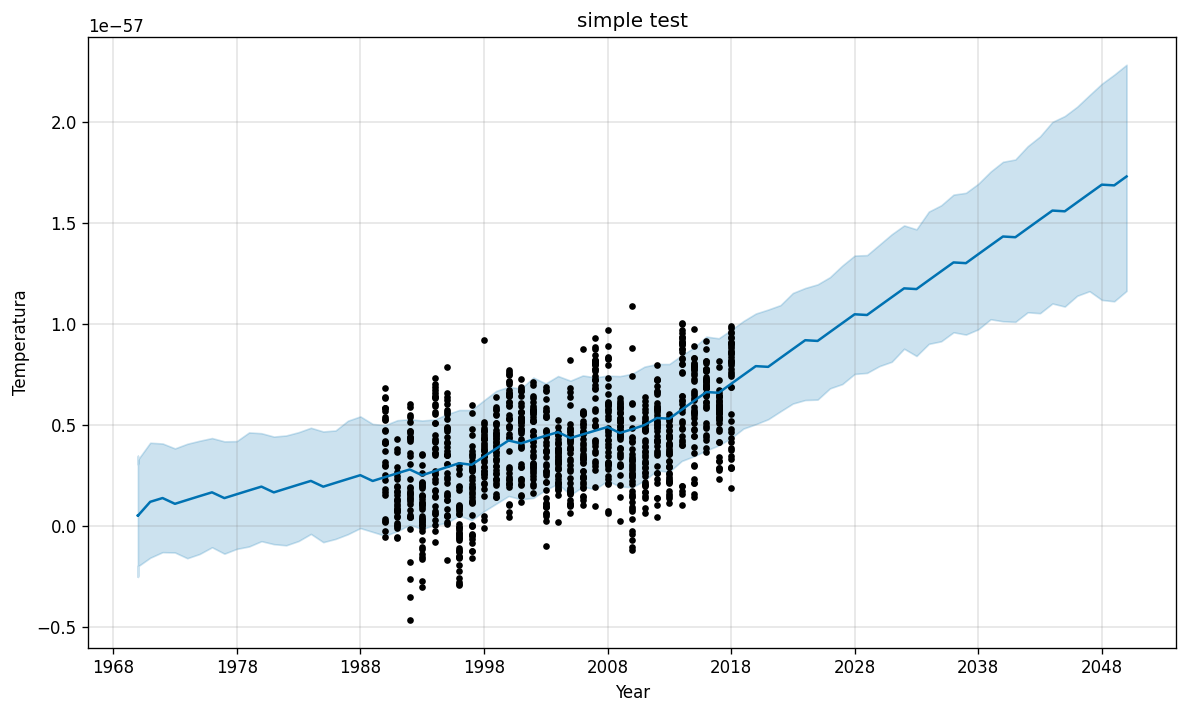

In [ ]:
datos2_prophet.plot(datos2_forecast,xlabel="Year",ylabel="Temperatura")
plt.title("simple test")
#representamos la predicción 

# Las conclusiones son que las temperaturas medias de los ultimos años deberían bajar en torno a cuatro veces, para que la tendencia de la temperatura sea más baja, y que en el año 2050, se cumpla el acuerdo de parís.

Para llegar a estos resultados, la contaminación debería bajar de forma considerable en los proximos años y que esto repercutiera de forma inmediata en la bajada de la temperatura. Haciendo la suposición de que se consiguieran reducir dichas emisiones y prouducir un porcentaje muy alto de la energía global, mediante las renovables. Es decir un aumento de 4 veces la producción de renovables y reducir cuatro veces los niveles de Co2, Metano y N2o conseguiramos que la temperatura global en el año 2050 aumentara en 1,5 grados centígrados.
Siendo fundamental que la temperatura se vea afectada de forma inmediata, pero según diversos estudios, dichas variaciones necesitan un periodo de tiempo. Por lo que si mejorasen estas condiciones, se podrian notar cambios notables a partir de los 5-10 años. 
Se ha probado a reducir la variación de la tmeperatura a la mitad, pero con dicha susposición no se alcanza a los onjetivos de 2050.